In [ ]:
!pip install yfinance

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Libraries loaded successfully!")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d')}")

In [16]:
# Let's inspect what structure we got
print("Column structure:")
print(data.columns)
print("\n" + "="*50)
print("\nColumn levels:")
print(f"Number of levels: {data.columns.nlevels}")
print("\n" + "="*50)
print("\nFirst few rows of raw data:")
print(data.head())

Column structure:
MultiIndex([( 'Close',  'AAPL'),
            ( 'Close',   'BAC'),
            ( 'Close',     'C'),
            ( 'Close', 'GOOGL'),
            ( 'Close',    'GS'),
            ( 'Close',   'JPM'),
            ( 'Close',  'META'),
            ( 'Close',  'MSFT'),
            ( 'Close',  'NVDA'),
            ( 'Close',   'WFC'),
            (  'High',  'AAPL'),
            (  'High',   'BAC'),
            (  'High',     'C'),
            (  'High', 'GOOGL'),
            (  'High',    'GS'),
            (  'High',   'JPM'),
            (  'High',  'META'),
            (  'High',  'MSFT'),
            (  'High',  'NVDA'),
            (  'High',   'WFC'),
            (   'Low',  'AAPL'),
            (   'Low',   'BAC'),
            (   'Low',     'C'),
            (   'Low', 'GOOGL'),
            (   'Low',    'GS'),
            (   'Low',   'JPM'),
            (   'Low',  'META'),
            (   'Low',  'MSFT'),
            (   'Low',  'NVDA'),
            (   'Low',   

In [17]:
# Define stock tickers
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA', 'META']
banking_stocks = ['JPM', 'BAC', 'WFC', 'C', 'GS']

all_stocks = tech_stocks + banking_stocks

# Set date range (10 years)
end_date = datetime.now()
start_date = end_date - timedelta(days=365*10)

print(f"📊 Downloading data for {len(all_stocks)} stocks...")
print(f"Date range: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")
print(f"\nTech stocks: {', '.join(tech_stocks)}")
print(f"Banking stocks: {', '.join(banking_stocks)}")

# Download stock data
data = yf.download(all_stocks, start=start_date, end=end_date)

# Extract Close prices (these are already adjusted in yfinance)
stock_data = data['Close']

print(f"\n✅ Downloaded {len(stock_data)} days of data!")
print(f"\nFirst few rows of data:")
print(stock_data.head())
print(f"\nData shape: {stock_data.shape[0]} days × {stock_data.shape[1]} stocks")
print(f"\nColumn names: {list(stock_data.columns)}")

📊 Downloading data for 10 stocks...
Date range: 2015-12-10 to 2025-12-07

Tech stocks: AAPL, MSFT, GOOGL, NVDA, META
Banking stocks: JPM, BAC, WFC, C, GS


/var/folders/cc/29jyf78n0_9gnj6pl_72l7bc0000gn/T/ipykernel_25900/1249950503.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_stocks, start=start_date, end=end_date)
[*********************100%***********************]  10 of 10 completed


✅ Downloaded 2512 days of data!

First few rows of data:
Ticker           AAPL        BAC          C      GOOGL          GS        JPM  \
Date                                                                            
2015-12-10  26.192720  13.814933  39.328480  37.741692  148.413040  50.061031   
2015-12-11  25.518576  13.437431  38.178120  37.263988  143.889984  48.885990   
2015-12-14  25.360752  13.493653  38.170647  37.865829  143.759567  49.038593   
2015-12-15  24.912064  13.991632  39.231358  37.744175  148.331512  50.434898   
2015-12-16  25.103706  14.256692  40.262177  38.563522  151.754425  51.526016   

Ticker            META       MSFT      NVDA        WFC  
Date                                                    
2015-12-10  104.774094  48.395000  0.804467  40.974117  
2015-12-11  101.494324  47.335506  0.792515  40.197475  
2015-12-14  104.018761  48.281166  0.794466  40.114536  
2015-12-15  103.909431  48.333698  0.804223  41.403927  
2015-12-16  106.135704  49.14801

In [18]:
# Calculate daily returns (percent change from previous day)
daily_returns = stock_data.pct_change()

# Drop the first row (it's NaN because there's no previous day)
daily_returns = daily_returns.dropna()

print("📈 Daily Returns Calculated!")
print(f"\nFirst few days of returns:")
print(daily_returns.head())
print(f"\nExample: If AAPL shows 0.02, that means it went UP 2% that day")
print(f"         If AAPL shows -0.01, that means it went DOWN 1% that day")

📈 Daily Returns Calculated!

First few days of returns:
Ticker          AAPL       BAC         C     GOOGL        GS       JPM  \
Date                                                                     
2015-12-11 -0.025738 -0.027326 -0.029250 -0.012657 -0.030476 -0.023472   
2015-12-14 -0.006185  0.004184 -0.000196  0.016151 -0.000906  0.003122   
2015-12-15 -0.017692  0.036905  0.027789 -0.003213  0.031803  0.028474   
2015-12-16  0.007693  0.018944  0.026275  0.021708  0.023076  0.021634   
2015-12-17 -0.021196 -0.025352 -0.019666 -0.008705 -0.019334 -0.018510   

Ticker          META      MSFT      NVDA       WFC  
Date                                                
2015-12-11 -0.031303 -0.021893 -0.014858 -0.018954  
2015-12-14  0.024873  0.019978  0.002463 -0.002063  
2015-12-15 -0.001051  0.001088  0.012281  0.032143  
2015-12-16  0.021425  0.016848  0.006066  0.017119  
2015-12-17 -0.005337 -0.007661 -0.015074 -0.006804  

Example: If AAPL shows 0.02, that means it went UP 2%

In [19]:
# Calculate key metrics for each stock

# Annualized return (average daily return × 252 trading days)
annual_returns = daily_returns.mean() * 252

# Annualized volatility (standard deviation × sqrt(252))
annual_volatility = daily_returns.std() * np.sqrt(252)

# Create summary DataFrame
summary = pd.DataFrame({
    'Annual Return': annual_returns,
    'Annual Volatility': annual_volatility,
    'Return/Risk Ratio': annual_returns / annual_volatility
})

# Add sector column
summary['Sector'] = ['Tech' if ticker in tech_stocks else 'Banking' 
                     for ticker in summary.index]

# Sort by annual return
summary = summary.sort_values('Annual Return', ascending=False)

print("📊 STOCK PERFORMANCE SUMMARY (10 Years)")
print("="*70)
print(summary)
print("\n💡 Return/Risk Ratio: Higher is better (more return per unit of risk)")

📊 STOCK PERFORMANCE SUMMARY (10 Years)
        Annual Return  Annual Volatility  Return/Risk Ratio   Sector
Ticker                                                              
NVDA         0.668156           0.498732           1.339708     Tech
AAPL         0.279768           0.291166           0.960852     Tech
MSFT         0.266875           0.267889           0.996215     Tech
META         0.261841           0.385554           0.679129     Tech
GOOGL        0.256583           0.288348           0.889835     Tech
JPM          0.222623           0.275882           0.806950  Banking
GS           0.219770           0.297003           0.739959  Banking
BAC          0.185624           0.312864           0.593305  Banking
C            0.158290           0.334352           0.473422  Banking
WFC          0.130502           0.321504           0.405912  Banking

💡 Return/Risk Ratio: Higher is better (more return per unit of risk)


✅ Visualizations created and saved as 'stock_analysis.png'!


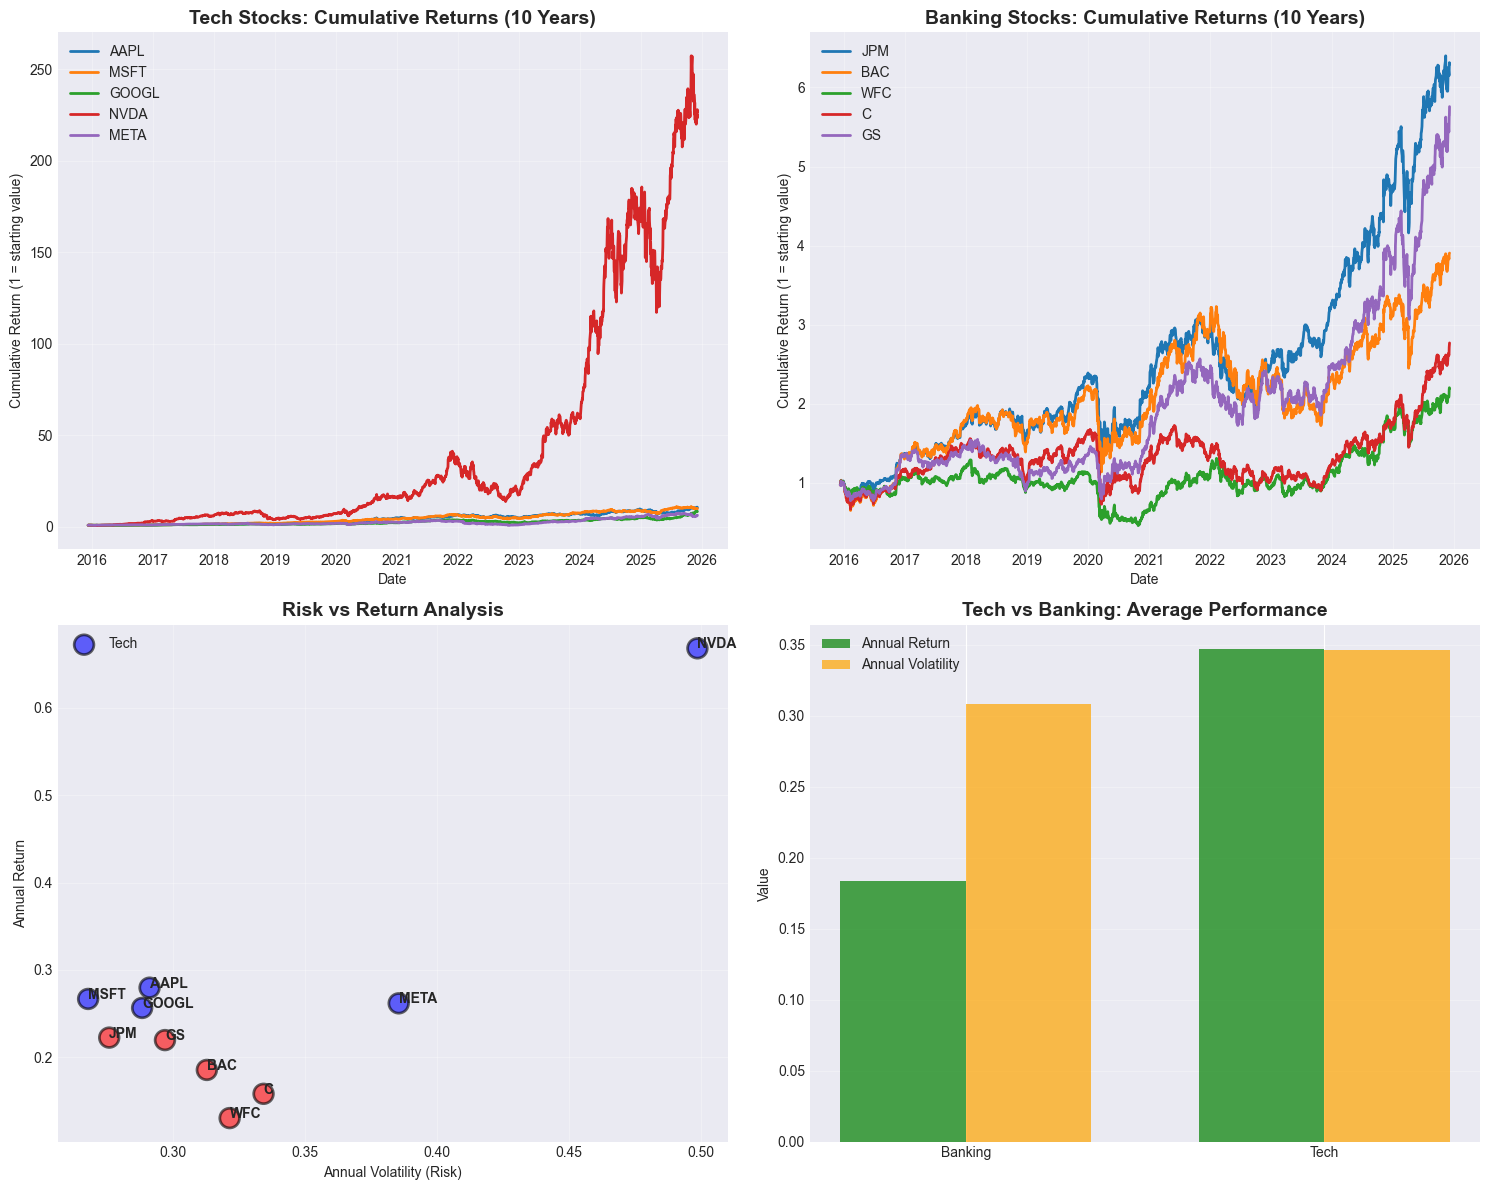

In [20]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cumulative Returns Over Time
cumulative_returns = (1 + daily_returns).cumprod()

# Plot tech stocks
for stock in tech_stocks:
    axes[0, 0].plot(cumulative_returns.index, cumulative_returns[stock], 
                    label=stock, linewidth=2)

axes[0, 0].set_title('Tech Stocks: Cumulative Returns (10 Years)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Cumulative Return (1 = starting value)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Banking Stocks Cumulative Returns
for stock in banking_stocks:
    axes[0, 1].plot(cumulative_returns.index, cumulative_returns[stock], 
                    label=stock, linewidth=2)

axes[0, 1].set_title('Banking Stocks: Cumulative Returns (10 Years)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Cumulative Return (1 = starting value)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Return vs Risk Scatter Plot
colors = ['blue' if sector == 'Tech' else 'red' for sector in summary['Sector']]
axes[1, 0].scatter(summary['Annual Volatility'], summary['Annual Return'], 
                   c=colors, s=200, alpha=0.6, edgecolors='black', linewidth=2)

# Add labels for each point
for idx, row in summary.iterrows():
    axes[1, 0].annotate(idx, (row['Annual Volatility'], row['Annual Return']),
                       fontsize=10, fontweight='bold')

axes[1, 0].set_title('Risk vs Return Analysis', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Annual Volatility (Risk)')
axes[1, 0].set_ylabel('Annual Return')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(['Tech', 'Banking'], loc='upper left')

# Plot 4: Sector Comparison (Bar Chart)
sector_avg = summary.groupby('Sector')[['Annual Return', 'Annual Volatility']].mean()
x = range(len(sector_avg))
width = 0.35

axes[1, 1].bar([i - width/2 for i in x], sector_avg['Annual Return'], 
               width, label='Annual Return', color='green', alpha=0.7)
axes[1, 1].bar([i + width/2 for i in x], sector_avg['Annual Volatility'], 
               width, label='Annual Volatility', color='orange', alpha=0.7)

axes[1, 1].set_title('Tech vs Banking: Average Performance', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(sector_avg.index)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('stock_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Visualizations created and saved as 'stock_analysis.png'!")
plt.show()

In [21]:
# Calculate sector averages
tech_avg_return = summary[summary['Sector'] == 'Tech']['Annual Return'].mean()
banking_avg_return = summary[summary['Sector'] == 'Banking']['Annual Return'].mean()

# Find best and worst performers
best_stock = summary.iloc[0]
worst_stock = summary.iloc[-1]

# Calculate correlation between tech and banking
tech_returns = daily_returns[tech_stocks].mean(axis=1)
banking_returns = daily_returns[banking_stocks].mean(axis=1)
correlation = tech_returns.corr(banking_returns)

print("="*70)
print("📊 KEY FINDINGS FROM 10-YEAR STOCK MARKET ANALYSIS")
print("="*70)

print(f"\n🏆 TOP PERFORMER:")
print(f"   {best_stock.name}: {best_stock['Annual Return']*100:.1f}% annual return")
print(f"   Risk (Volatility): {best_stock['Annual Volatility']*100:.1f}%")
print(f"   Return/Risk Ratio: {best_stock['Return/Risk Ratio']:.2f}")

print(f"\n📉 WORST PERFORMER:")
print(f"   {worst_stock.name}: {worst_stock['Annual Return']*100:.1f}% annual return")
print(f"   Risk (Volatility): {worst_stock['Annual Volatility']*100:.1f}%")
print(f"   Return/Risk Ratio: {worst_stock['Return/Risk Ratio']:.2f}")

print(f"\n🏢 SECTOR COMPARISON:")
print(f"   Tech Average Return: {tech_avg_return*100:.1f}%")
print(f"   Banking Average Return: {banking_avg_return*100:.1f}%")
print(f"   Tech Outperformed Banking by: {(tech_avg_return - banking_avg_return)*100:.1f}%")

print(f"\n🔗 SECTOR CORRELATION:")
print(f"   Tech vs Banking correlation: {correlation:.3f}")
print(f"   Interpretation: {'Moderately correlated' if correlation > 0.5 else 'Weakly correlated'}")
print(f"   (1.0 = move perfectly together, 0.0 = independent, -1.0 = move oppositely)")

print(f"\n💡 KEY INSIGHTS:")
print(f"   1. Tech sector dominated with {tech_avg_return*100:.1f}% avg return vs {banking_avg_return*100:.1f}% for banking")
print(f"   2. NVDA led all stocks with explosive {best_stock['Annual Return']*100:.1f}% annual growth")
print(f"   3. All 5 tech stocks outperformed all 5 banking stocks")
print(f"   4. Banking stocks showed more stability but significantly lower returns")
print(f"   5. The AI boom (2023+) created massive divergence in tech performance")

print("\n" + "="*70)
print("✅ Analysis complete! Ready to document in README.")
print("="*70)

📊 KEY FINDINGS FROM 10-YEAR STOCK MARKET ANALYSIS

🏆 TOP PERFORMER:
   NVDA: 66.8% annual return
   Risk (Volatility): 49.9%
   Return/Risk Ratio: 1.34

📉 WORST PERFORMER:
   WFC: 13.1% annual return
   Risk (Volatility): 32.2%
   Return/Risk Ratio: 0.41

🏢 SECTOR COMPARISON:
   Tech Average Return: 34.7%
   Banking Average Return: 18.3%
   Tech Outperformed Banking by: 16.3%

🔗 SECTOR CORRELATION:
   Tech vs Banking correlation: 0.496
   Interpretation: Weakly correlated
   (1.0 = move perfectly together, 0.0 = independent, -1.0 = move oppositely)

💡 KEY INSIGHTS:
   1. Tech sector dominated with 34.7% avg return vs 18.3% for banking
   2. NVDA led all stocks with explosive 66.8% annual growth
   3. All 5 tech stocks outperformed all 5 banking stocks
   4. Banking stocks showed more stability but significantly lower returns
   5. The AI boom (2023+) created massive divergence in tech performance

✅ Analysis complete! Ready to document in README.
